In [1]:
# If not already installed, do: pip install pandas fastparquet
import pandas as pd

URL_DATA = 'https://storage.data.gov.my/transportation/ktmb/ets_2025.parquet'

df = pd.read_parquet(URL_DATA)
if 'date' in df.columns: df['date'] = pd.to_datetime(df['date'])

print(df)

             date   time         origin   destination  ridership
0      2025-01-01  00:00     Batu Gajah    Alor Setar          1
1      2025-01-01  00:00     Batu Gajah          Arau          1
2      2025-01-01  00:00     Batu Gajah  Padang Besar          1
3      2025-01-01  00:00         Kampar  Padang Besar          2
4      2025-01-01  00:00  Tanjong Malim    Alor Setar          1
...           ...    ...            ...           ...        ...
175890 2025-05-11  23:00  Tanjong Malim    Batu Gajah          1
175891 2025-05-11  23:00  Tanjong Malim          Ipoh          7
175892 2025-05-11  23:00  Tanjong Malim        Kampar          1
175893 2025-05-11  23:00  Tanjong Malim       Sungkai          1
175894 2025-05-11  23:00  Tanjong Malim    Tapah Road          1

[175895 rows x 5 columns]


In [2]:
df.sort_values(by='date', ascending=False)

,date,time,origin,destination,ridership
175894,2025-05-11,23:00,Tanjong Malim,Tapah Road,1
175045,2025-05-11,10:00,Batu Gajah,Bukit Mertajam,2
175038,2025-05-11,10:00,Bandar Tasek Selatan,Alor Setar,1
175039,2025-05-11,10:00,Bandar Tasek Selatan,Anak Bukit,1
175040,2025-05-11,10:00,Bandar Tasek Selatan,Arau,1
...,...,...,...,...,...
846,2025-01-01,16:00,Seremban,Sungai Buloh,2
847,2025-01-01,16:00,Seremban,Taiping,3
848,2025-01-01,16:00,Seremban,Tanjong Malim,1
849,2025-01-01,16:00,Seremban,Tapah Road,3


In [3]:
#df = df.sample(frac=0.1,random_state=42)
#df = df.head(10)
#df = df[df['destination']=='Pulau Sebang (Tampin)']

In [4]:
df['destination'].value_counts()

destination
KL Sentral               18255
Ipoh                     16018
Sungai Buloh             12163
Taiping                   9925
Kampar                    9052
Tanjong Malim             8845
Batu Gajah                8643
Kuala Lumpur              7494
Butterworth               6390
Parit Buntar              6233
Kuala Kangsar             6009
Bukit Mertajam            5945
Arau                      5656
Alor Setar                5562
Sungai Petani             5522
Padang Besar              4168
Tapah Road                4112
Seremban                  3539
Gemas                     3415
Kajang                    3206
Pulau Sebang (Tampin)     3151
Bandar Tasek Selatan      3014
Tasek Gelugor             2736
Rawang                    2528
Batang Melaka             1814
Nibong Tebal              1787
Kepong Sentral            1664
Slim River                1484
Sungkai                   1472
Segamat                   1323
Sungai Siput              1202
Bagan Serai               1

In [5]:
df.sort_values(by=['ridership'], ascending=False)

,date,time,origin,destination,ridership
117475,2025-03-30,15:00,Ipoh,KL Sentral,349
128181,2025-04-06,15:00,Ipoh,KL Sentral,317
126514,2025-04-05,15:00,Ipoh,KL Sentral,300
29116,2025-01-23,12:00,KL Sentral,Ipoh,289
51231,2025-02-08,15:00,Ipoh,KL Sentral,282
...,...,...,...,...,...
175892,2025-05-11,23:00,Tanjong Malim,Kampar,1
175890,2025-05-11,23:00,Tanjong Malim,Batu Gajah,1
38,2025-01-01,05:00,Parit Buntar,Batu Gajah,1
37,2025-01-01,05:00,Kampar,Rawang,1


In [6]:
df.groupby('origin')['ridership'].sum().reset_index().sort_values(by='ridership', ascending=False)

,origin,ridership
13,KL Sentral,487308
12,Ipoh,194069
9,Butterworth,99401
28,Sungai Buloh,64059
8,Bukit Mertajam,62848
21,Padang Besar,58533
32,Taiping,54968
29,Sungai Petani,42050
7,Batu Gajah,40730
0,Alor Setar,39906


In [7]:
df.groupby('destination')['ridership'].sum().reset_index().sort_values(by='ridership', ascending=False)

,destination,ridership
13,KL Sentral,479828
12,Ipoh,192186
9,Butterworth,107637
28,Sungai Buloh,66666
8,Bukit Mertajam,62607
21,Padang Besar,60605
32,Taiping,55698
29,Sungai Petani,41814
0,Alor Setar,41294
7,Batu Gajah,38049


Sankey Chart

In [8]:
# import plotly.graph_objects as go

# #combine all unique labels
# labels = list(pd.unique(df[['origin', 'destination']].values.ravel()))

# # map origin and destination
# df['source'] = df['origin'].apply(lambda x:labels.index(x))
# df['target'] = df['destination'].apply(lambda x:labels.index(x))



In [9]:
# fig = go.Figure(data=[go.Sankey(
#     node=dict(
#         pad=15,
#         thickness = 20,
#         line = dict(color="black", width=0.5),
#         label=labels
#     ),
#     link=dict(
#         source=df['source'],
#         target=df['target'],
#         value=df['ridership']
#     )
# )])

In [10]:
# import plotly.io as pio
# pio.renderers.default = 'browser'
# fig.show()

In [13]:
df['hour'] = pd.to_datetime(df['time']).dt.hour

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13840\2517406752.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour'] = pd.to_datetime(df['time']).dt.hour


In [22]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [18]:
# group and aggregater ridership by date
daily_ridership = df.groupby('date')['ridership'].sum().reset_index()

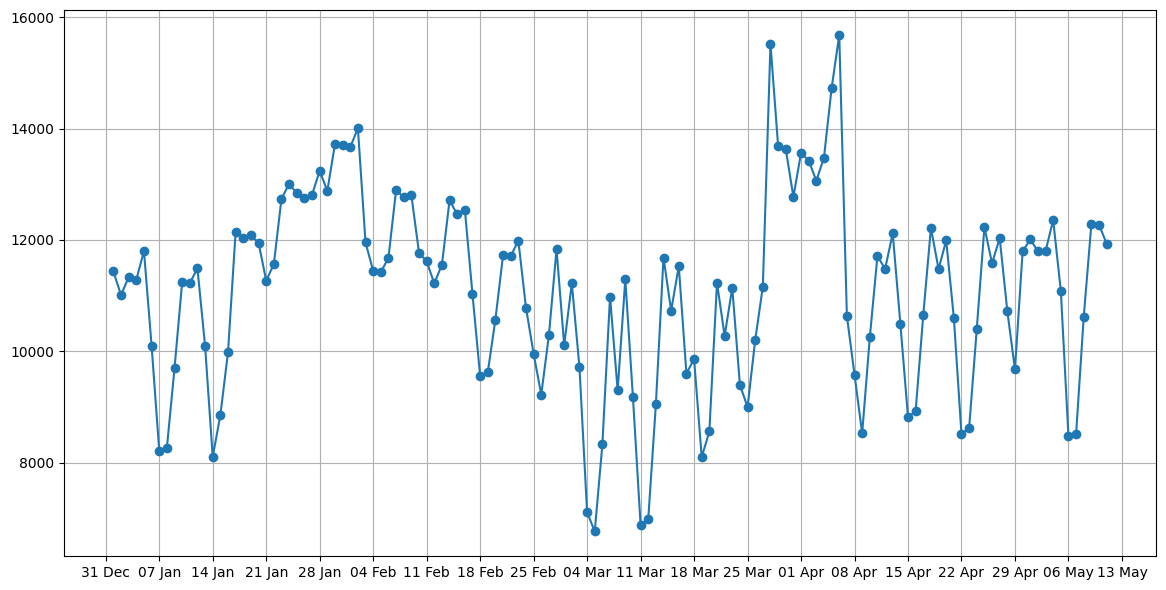

In [23]:
# plot the graph
plt.figure(figsize=(12,6))
plt.plot(daily_ridership['date'],daily_ridership['ridership'],marker='o')
plt.grid(True)
plt.tight_layout()

#configure x axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))



plt.show()

In [48]:
# heatmap

df['day'] = pd.to_datetime(df['date']).dt.day_name()
df['hour'] = pd.to_datetime(df['time'], format='%H:%M').dt.hour

# pivot table
pivot = df.pivot_table(index='day', columns='hour', values='ridership', aggfunc='mean')

# day order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot = pivot.reindex(day_order)

In [49]:
pivot

hour,0,1,2,3,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
Monday,2.403101,2.550000,1.157895,1.500000,10.936143,8.900161,7.695989,9.303877,6.666667,5.346919,...,5.265201,15.850803,5.281519,6.020603,9.595068,6.274785,5.818540,8.119508,6.149038,3.353191
Tuesday,2.392857,3.327869,1.923077,1.400000,11.267559,8.493827,7.284929,8.351183,6.387152,5.206827,...,5.188725,14.174297,5.083744,5.477058,8.661166,5.893312,5.769685,7.737676,6.399663,3.669231
Wednesday,2.692308,2.960000,2.705882,1.400000,10.646179,7.853846,7.379573,8.351796,5.995604,5.515326,...,5.285047,13.938497,5.164540,5.110504,9.029995,6.341906,6.328316,8.316558,8.092084,3.956175
Thursday,2.887755,3.683333,2.500000,1.300000,10.200658,8.648980,8.378337,8.756277,6.255672,5.600096,...,6.471030,14.762010,5.400082,5.179385,9.576853,6.997928,7.159966,10.367799,9.364188,4.856031
Friday,3.214286,3.242857,1.529412,2.750000,10.703937,9.806452,8.759785,10.039000,6.565194,5.357011,...,6.475621,16.194602,5.877968,5.573062,9.765245,6.696142,7.330068,11.641485,9.832579,5.033742
Saturday,3.561644,3.022989,1.576923,1.300000,13.887120,12.950920,8.633916,10.797245,7.038565,5.293002,...,6.076035,15.549466,5.512322,5.866549,9.908158,6.732867,6.509599,9.637427,7.721992,3.693662
Sunday,2.430657,2.735294,1.750000,1.571429,12.130933,11.731501,8.606083,9.646166,6.661133,5.279946,...,5.356938,17.515965,5.636480,6.805248,10.666978,6.911765,7.198473,9.408813,7.794654,3.650000


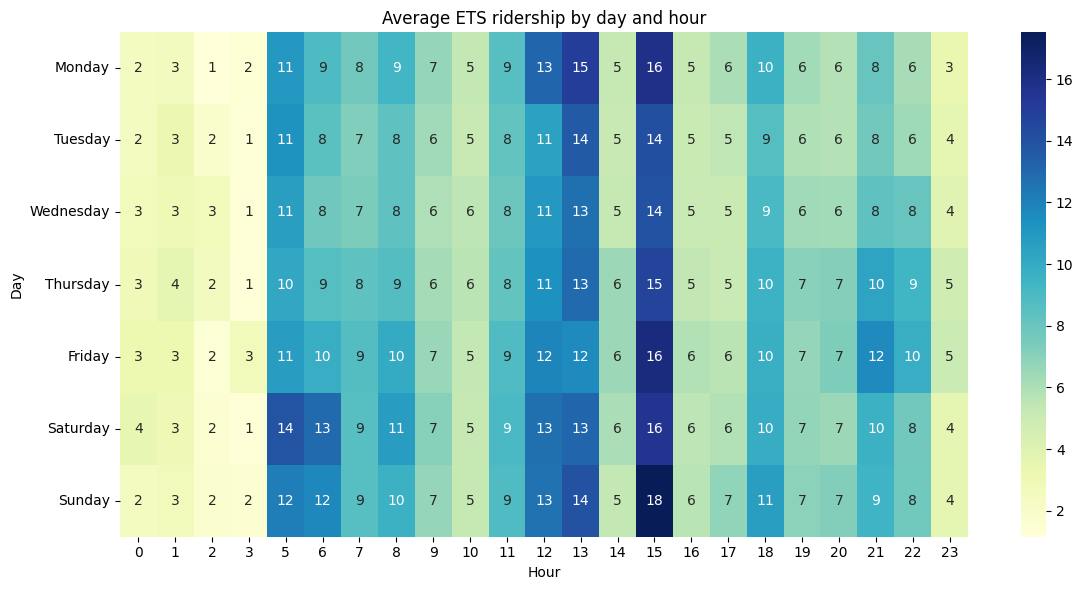

In [51]:
# plot heatmap
import seaborn as sns

plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title("Average ETS ridership by day and hour")
plt.xlabel("Hour")
plt.ylabel("Day")
plt.tight_layout()
plt.show()

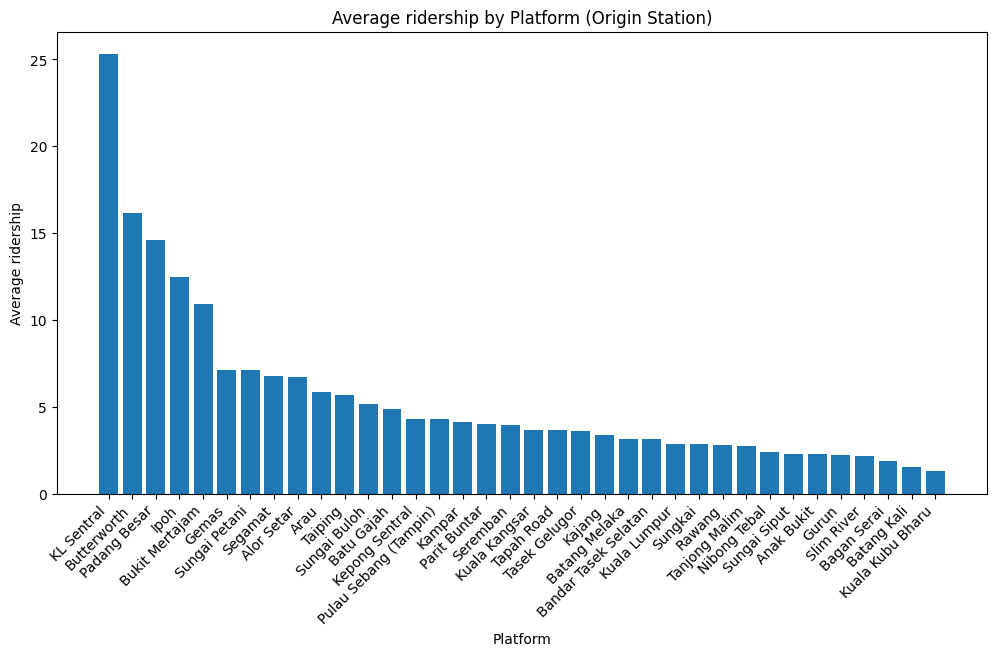

In [57]:
# bar graph
platform_ridership = df.groupby('origin')['ridership'].mean().reset_index()
platform_ridership = platform_ridership.sort_values(by='ridership',ascending=False)

plt.figure(figsize=(12,6))
plt.bar(platform_ridership['origin'], platform_ridership['ridership'])
plt.title("Average ridership by Platform (Origin Station)")
plt.xlabel("Platform")
plt.ylabel("Average ridership")
plt.xticks(rotation=45, ha='right')
plt.show()

In [68]:
df_kl_sentral = df[df['origin']=='KL Sentral']
df_kl_sentral['ridership'].sum()

np.int64(487308)

In [98]:
df_kl_sentral.groupby(['date','hour'])['ridership'].sum().mean()

np.float64(279.0996563573883)

In [99]:
df_kl_sentral

,date,time,origin,destination,ridership,hour,day
99,2025-01-01,07:00,KL Sentral,Alor Setar,12,7,Wednesday
100,2025-01-01,07:00,KL Sentral,Arau,16,7,Wednesday
101,2025-01-01,07:00,KL Sentral,Batu Gajah,3,7,Wednesday
102,2025-01-01,07:00,KL Sentral,Ipoh,22,7,Wednesday
103,2025-01-01,07:00,KL Sentral,Kampar,2,7,Wednesday
...,...,...,...,...,...,...,...
175841,2025-05-11,22:00,KL Sentral,Parit Buntar,10,22,Sunday
175842,2025-05-11,22:00,KL Sentral,Sungai Petani,38,22,Sunday
175843,2025-05-11,22:00,KL Sentral,Taiping,25,22,Sunday
175844,2025-05-11,22:00,KL Sentral,Tanjong Malim,2,22,Sunday


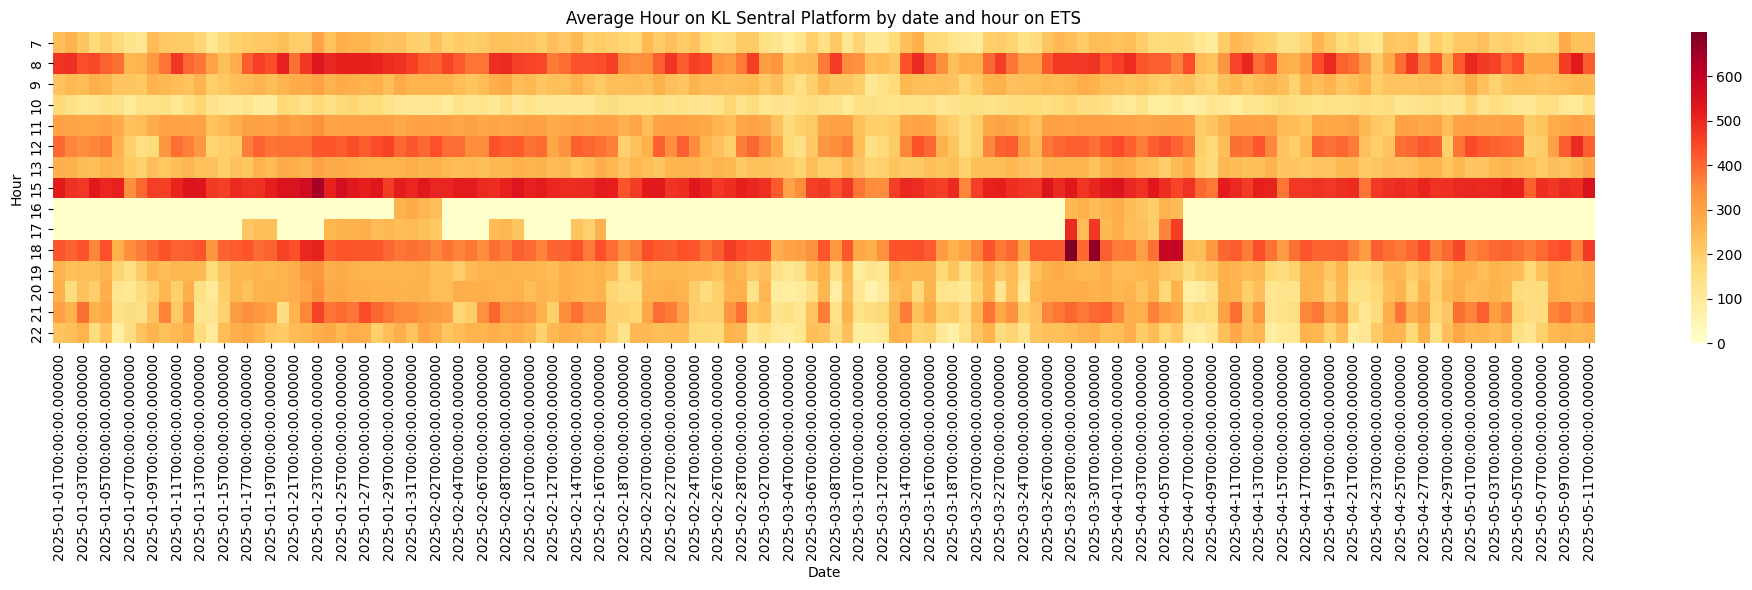

In [109]:
#When is the average busiest hour in KL Central

heatmap_data = df_kl_sentral.groupby(['date', 'hour'])['ridership'].sum().unstack(fill_value=0)
#heatmap_data = heatmap_data.reindex(day_order)

#plot heatmap
plt.figure(figsize=(20,6))
sns.heatmap(heatmap_data.T,cmap='YlOrRd')
plt.title('Average Hour on KL Sentral Platform by date and hour on ETS')
plt.xlabel('Date')
plt.ylabel('Hour')
plt.tight_layout()
plt.show()

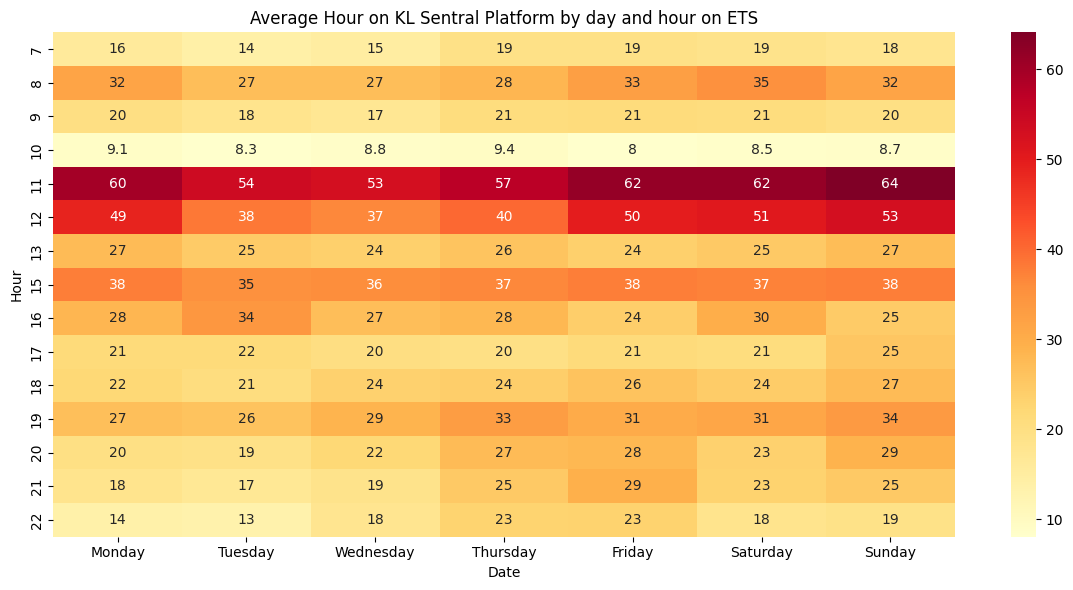

In [113]:
#When is the average busiest hour in KL Central

heatmap_data = df_kl_sentral.groupby(['day', 'hour'])['ridership'].mean().unstack(fill_value=0)
heatmap_data = heatmap_data.reindex(day_order)

#plot heatmap
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data.T, annot=True,cmap='YlOrRd')
plt.title('Average Hour on KL Sentral Platform by day and hour on ETS')
plt.xlabel('Date')
plt.ylabel('Hour')
plt.tight_layout()
plt.show()


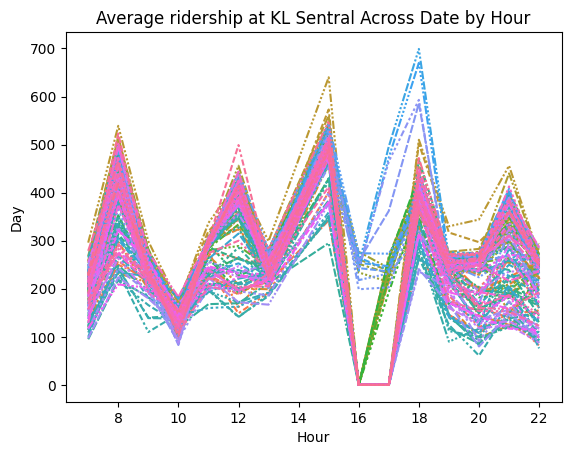

In [107]:
sns.lineplot(data=heatmap_data.T)
plt.title("Average ridership at KL Sentral Across Date by Hour")
plt.xlabel("Hour")
plt.legend().remove()
plt.ylabel("Day")
plt.show()